# Feature Selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. CRIM - per capita crime rate by town

2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS - proportion of non-retail business acres per town.

4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5. NOX - nitric oxides concentration (parts per 10 million)

6. RM - average number of rooms per dwelling

7. AGE - proportion of owner-occupied units built prior to 1940

8. DIS - weighted distances to five Boston employment centres

9. RAD - index of accessibility to radial highways

10. TAX - full-value property-tax rate per $10,000

11. TRATIO - pupil-teacher ratio by town

12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. LSTAT - % lower status of the population

14. MEDV - Median value of owner-occupied homes in $1000's 

In [8]:
train = pd.read_csv('./boston-housing/train.csv'
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [9]:
test = pd.read_csv('./boston-housing/test.csv')
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [23]:
features_columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']
X_train = train[features_columns]
y_train = train['medv']

# 1. Percentage of missing values

- As we can see, we don't have missing values

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


# 2. Amount of Variation

- We have to find out about Standard Deviation

- Pay attention for NOX feature, has a low std

In [12]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


# 3. Pairwise Correlation

- Correlations > +-0.65
    - crim ~ rad = 0.66
    - indus ~ nox = 0.75
    - indus ~ dis = -0.70
    - indus ~ tax = 0.71
    - nox ~ age = 0.74
    - nox ~ dis = -0.77
    - nox ~ tax = 0.67
    - age ~ dis = -0.76
    - rad ~ tax = 0.90

In [13]:
train.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


In [14]:
import seaborn as sns

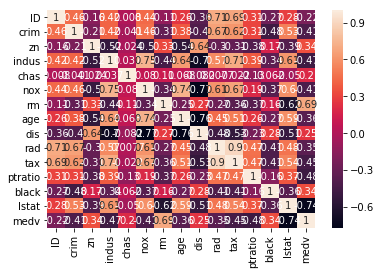

In [20]:
sns.heatmap(train.corr(),annot=True)

# 4. Multicolinearity

# 5. Correlation with the Target

- Correlation > +-0.65
    - medv ~ rm = 0.69
    - medv ~ lstat = -0.74
   

# 6. Backward Selection

In [24]:
# Manera Rápida de hacer un Selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm, 3)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False  True  True  True False False False False False False
 False]
[ 6  8  7  1  1  1 11  3  5  9  2 10  4]


In [26]:
import statsmodels.formula.api as smf

In [27]:
lm = smf.ols(formula='medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat',data=train).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     67.41
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           2.89e-83
Time:                        22:28:16   Log-Likelihood:                -990.09
No. Observations:                 333   AIC:                             2008.
Df Residuals:                     319   BIC:                             2061.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0454      6.296      5.407      0.000      21.658      46.433
crim          -0.0525      0.054     -0.976      0.330      -0.158       0.053
zn             0.0474      0.017      2.805      0.005       0.014       0.081
indus          0.0539      0.074      0.725      0.469      -0.092       0.200
chas           3.7849      1.150      3.292      0.001       1.523       6.047
nox          -15.7397      4.856     -3.241      0.001     -25.293      -6.186
rm             3.7688      0.520      7.247      0.000       2.746       4.792
age           -0.0046      0.017     -0.274      0.784      -0.038       0.029
dis           -1.5488      0.264     -5.860      0.000      -2.069      -1.029
rad            0.3290      0.082      4.019      0.000       0.168       0.490
tax           -0.0129      0.005     -2.847      0.005      -0.022      -0.004
ptratio       -0.8570      0.165     -5.183      0.000      -1.182      -0.532
black          0.0117      0.004      3.243      0.001       0.005       0.019
lstat         -0.6003      0.064     -9.403      0.000      -0.726      -0.475
==============================================================================
Omnibus:                      125.336   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.547
Skew:                           1.611   Prob(JB):                    8.19e-107
Kurtosis:                       7.983   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Quitamos age que tiene un p-value muy elevado
lm = smf.ols(formula='medv~crim+zn+indus+chas+nox+rm+dis+rad+tax+ptratio+black+lstat',data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     73.24
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           3.42e-84
Time:                        22:29:37   Log-Likelihood:                -990.13
No. Observations:                 333   AIC:                             2006.
Df Residuals:                     320   BIC:                             2056.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2034      6.261      5.463      0.000      21.886      46.521
crim          -0.0525      0.054     -0.977      0.329      -0.158       0.053
zn             0.0479      0.017      2.854      0.005       0.015       0.081
indus          0.0544      0.074      0.734      0.464      -0.091       0.200
chas           3.7766      1.148      3.290      0.001       1.518       6.035
nox          -16.0905      4.677     -3.440      0.001     -25.292      -6.889
rm             3.7358      0.505      7.395      0.000       2.742       4.730
dis           -1.5228      0.246     -6.182      0.000      -2.007      -1.038
rad            0.3314      0.081      4.077      0.000       0.171       0.491
tax           -0.0130      0.005     -2.879      0.004      -0.022      -0.004
ptratio       -0.8611      0.164     -5.238      0.000      -1.185      -0.538
black          0.0116      0.004      3.238      0.001       0.005       0.019
lstat         -0.6058      0.061    -10.013      0.000      -0.725      -0.487
==============================================================================
Omnibus:                      124.026   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.781
Skew:                           1.597   Prob(JB):                    2.94e-104
Kurtosis:                       7.915   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Quitamos indus que tiene un p-value muy elevado
lm = smf.ols(formula='medv~crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat',data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     79.96
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           4.87e-85
Time:                        22:30:40   Log-Likelihood:                -990.41
No. Observations:                 333   AIC:                             2005.
Df Residuals:                     321   BIC:                             2051.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9450      6.246      5.434      0.000      21.656      46.234
crim          -0.0555      0.054     -1.036      0.301      -0.161       0.050
zn             0.0467      0.017      2.797      0.005       0.014       0.080
chas           3.8367      1.144      3.354      0.001       1.586       6.088
nox          -15.2210      4.521     -3.366      0.001     -24.116      -6.326
rm             3.7016      0.503      7.364      0.000       2.713       4.691
dis           -1.5646      0.239     -6.534      0.000      -2.036      -1.094
rad            0.3148      0.078      4.035      0.000       0.161       0.468
tax           -0.0115      0.004     -2.842      0.005      -0.020      -0.004
ptratio       -0.8435      0.163     -5.190      0.000      -1.163      -0.524
black          0.0115      0.004      3.211      0.001       0.004       0.019
lstat         -0.6004      0.060    -10.006      0.000      -0.718      -0.482
==============================================================================
Omnibus:                      124.353   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.635
Skew:                           1.600   Prob(JB):                    4.28e-105
Kurtosis:                       7.940   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Quitamos crim que tiene un p-value muy elevado
lm = smf.ols(formula='medv~zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat',data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     87.83
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           8.60e-86
Time:                        22:31:27   Log-Likelihood:                -990.96
No. Observations:                 333   AIC:                             2004.
Df Residuals:                     322   BIC:                             2046.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.1320      6.197      5.346      0.000      20.939      45.325
zn             0.0450      0.017      2.710      0.007       0.012       0.078
chas           3.8733      1.144      3.387      0.001       1.623       6.123
nox          -14.7806      4.502     -3.283      0.001     -23.637      -5.924
rm             3.7271      0.502      7.423      0.000       2.739       4.715
dis           -1.5377      0.238     -6.459      0.000      -2.006      -1.069
rad            0.2867      0.073      3.919      0.000       0.143       0.431
tax           -0.0113      0.004     -2.786      0.006      -0.019      -0.003
ptratio       -0.8357      0.162     -5.147      0.000      -1.155      -0.516
black          0.0125      0.003      3.605      0.000       0.006       0.019
lstat         -0.6151      0.058    -10.548      0.000      -0.730      -0.500
==============================================================================
Omnibus:                      122.611   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.191
Skew:                           1.574   Prob(JB):                    1.07e-103
Kurtosis:                       7.926   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
y_pred = lm.predict(test[['zn','chas', 'nox', 'rm', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']])

In [39]:
df = pd.DataFrame()
df['ID'] = test['ID']
df['medv'] = y_pred
df.head()

,ID,medv
0,3,32.407521
1,6,27.669926
2,8,20.937213
3,9,12.099096
4,10,21.425706


In [43]:
df.to_csv('Sub_Boston_Housing.csv',index=False)